In [ ]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
#import scipy.fftpack as fft
import numpy.fft as fft
from math import pi


In [97]:
class SimSp():
    
     
    def __init__(self,BW=10000, SD = 0.1):
        #super(SimSp, self).__init__()
        self.name = 'myMRS'        # Name you want to give to the simulated spectrum.
        self.BW = BW         # Bandwidth of the simulated spectrum [Hz]. ( BW=1/dt with dt is the sampling interval [s] ) 
        self.SD = SD     # Sampling duration of the signal [s]. ( SD=dt*(npoints-1[?])  with np is the number of samples )
        self.time0 = 0   # Time between the excitation and the start of the sampling. (For 0 order correction)
        self.B0 = 3          # Stregth of the main B0 field [T]
        
        self.dt= 0.5/self.BW
        self.npoints=int(self.SD*self.BW+1)
        print(self.npoints)
        
        self.t= np.linspace(0,self.SD,self.npoints)
        self.sig=np.zeros(self.t.shape)
        self.freq=np.zeros(self.t.shape)
        self.spec=np.zeros(self.t.shape)

        
        
        self.npeaks=0
        self.mets=[]
        
        self.nuc = 'H'  # Nucleus giving the signal
        if self.nuc is 'H':
            self.gamma = 42.57747892  #   Nucleus	1H --> gyro= 267.5221900 [MRad/s/T] or  42.57747892 [MHz/T]
            self.carrier = self.gamma*self.B0  # Carrier frequency in MHz
            
    def addpeak(self,ppm=1, magnitude=1, phase= 0 ):
        self.ppm = ppm          # Chemical shift relative to TMS in ppm
        self.magnitude = magnitude         # Magniude of the signal 
        self.phase= phase     # Phase of the signal 
        
        self.w = self.ppm*self.carrier*2*np.pi #demodulated angular frequency (Hz)
        self.npeaks+= 1  #peak counter
        #self.mets = self.mets.append("".join(map(str, ['Peak',self.npeaks])))    # Name of the molecule giving the nmr peak, e.g. Lac, Cho, NAA.
        self.sig=self.sig+self.magnitude*np.exp(1j*(self.w*self.t+self.phase))
       
    
        #print(self.npoints, self.dt)
        self.spec=fft.fftshift(fft.fft(self.sig))*2/self.npoints
        self.freq=fft.fftshift(fft.fftfreq(self.npoints,1/self.BW))
        #self.freq=np.linspace(-1,1,int(self.npoints))*self.BW/2;
    
        
    def autoshift(self):
        mysum=np.zeros(8)
        for ii in range(8):
            theta=2*np.pi/8*ii
            self.sig=self.sig*np.exp(1j*theta)
            self.spec=fft.fftshift(fft.fft(self.sig))*2/self.npoints
            sppos=np.copy(np.real(self.spec))
            sppos[sppos < 0.1] = 0
            mysum[ii]=np.sum(sppos)
            
            
        pie8th=np.argmax(mysum)
        theta=2*np.pi/8*pie8th
        self.sig=self.sig*np.exp(1j*theta)
        mysum=np.zeros(9)
        for ii in range(9):
            theta2=theta-np.pi/8*ii+np.pi/4/8*(ii)
            self.sig=self.sig*np.exp(1j*theta2)
            self.spec=fft.fftshift(fft.fft(self.sig))*2/self.npoints
            sppos=np.copy(np.real(self.spec))
            sppos[sppos < 0] = 0
            mysum[ii]=np.sum(sppos)
        
        pie89th=np.argmax(mysum)
        theta2=theta-np.pi/8*ii+np.pi/4/8*(ii)
        self.sig=self.sig*np.exp(1j*theta2)
        self.spec=fft.fftshift(fft.fft(self.sig))*2/self.npoints
            
        

    def show(self):   
        plt.subplot(2,1,1); plt.plot(self.t,np.real(self.sig)); plt.plot(self.t,np.imag(self.sig)); 
        plt.ylabel('Signal'); plt.xlabel('Time [s]');
        plt.title(self.name); plt.tight_layout()
       
        
        plt.subplot(2,1,2); plt.plot(self.freq/self.carrier,np.real(self.spec)); plt.plot(self.freq/self.carrier,np.imag(self.spec)); 
        #plt.subplot(2,1,2); plt.plot(self.freq,np.real(self.spec)); plt.plot(self.freq,np.imag(self.spec)); 

        plt.ylabel('Spectrum');  plt.xlabel('Frequency [ppm]')
        plt.legend(['Real','Imaginary'])
        
 

401


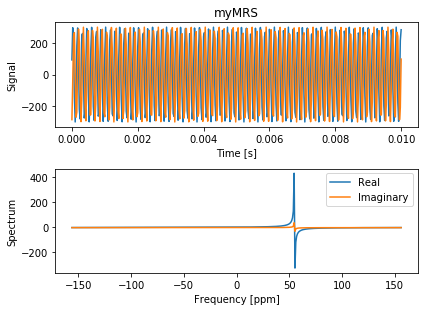

In [98]:
maris_nmr=SimSp(BW=40000,SD=0.01)      

  
maris_nmr.addpeak(ppm=55,magnitude=300, phase=8*2*np.pi/10)  


maris_nmr.show()


In [ ]:
nmr1=SimSp(BW=30000,SD = 0.01)
nmr1.addpeak(20, 5, 0)
print(nmr1.npeaks)
print(nmr1.name)


nmr1.addpeak(0, 0, 0)
print(nmr1.npeaks)
print(nmr1.mets)


nmr1.addpeak(0, 0, 0)
print(nmr1.npeaks)



nmr1.show()

In [ ]:
nmr1.autoshift()
nmr1.show()

In [ ]:
np.zeros(8)

In [ ]:
plt.subplot(2,1,1)
plt.plot(t,np.abs(kspace)); plt.title('Test signal') 
plt.ylabel('Amplitude'); plt.xlabel('Time (s)')

plt.subplot(2,1,2)
plt.plot(frq2,np.abs(spect2)**2); plt.title('Spectrum')
plt.ylabel('Power spectrum'); plt.xlabel('Frequency (Hz)')

plt.tight_layout()

In [ ]:
np.linspace(0,1,100).shape